# Javier Palomares Homework 1 b

## Correlations

* When given a data matrix, an easy way to tell if any two columns are correlated is to look at a scatter plot of each column against each other column. For a warm up, do this: Look at the data in DF1 in HW1b Data.zip.

In [21]:
df1FilePath="./DF1"
df2FilePath="./DF2"

import pandas as pd
df1 = pd.read_csv(df1FilePath,index_col=0)
df2 = pd.read_csv(df2FilePath,index_col=0)
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 4 columns):
0    10000 non-null float64
1    10000 non-null float64
2    10000 non-null float64
3    10000 non-null float64
dtypes: float64(4)
memory usage: 390.6 KB


,0,1,2,3
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.007704,0.009313,0.007586,-0.008455
std,1.000779,1.002686,1.000794,1.002581
min,-3.471566,-4.056024,-3.524182,-3.930215
25%,-0.663449,-0.663886,-0.666489,-0.697856
50%,0.017736,0.009027,0.012372,-0.007986
75%,0.667565,0.695943,0.672933,0.668582
max,3.854101,3.908736,3.608846,3.985592


 Which columns are (pairwise) correlated? Figure out how to do this with Pandas, and also how to do this with Seaborn. 

In [37]:
df1.corr()

,0,1,2,3
0,1.000000,-0.003998,0.990066,0.004111
1,-0.003998,1.000000,-0.004085,-0.990235
2,0.990066,-0.004085,1.000000,0.004067
3,0.004111,-0.990235,0.004067,1.000000


Using pandas, we see that columns at position 0 and position 2 are correlated, and columns at position 1 and 3 are negatively correlated

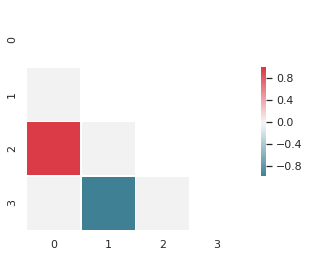

In [38]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style='white')
corr1 = df1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots();

# Generate a custom diverging colorma# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr1, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Using seaborn, I can see the correlation between columns 0 and 2, and the negative correlation between columns 1 and 3

* Compute the covariance matrix of the data. Write the explicit expression for what this
is, and then use any command you like (e.g., np.cov) to compute the 4 × 4 matrix.
Explain why the numbers that you get fit with the plots you got.

Let DF1 have size $n \times n$.
Let $x_i$ be the i-th column of DF1 and $x_i[j]$ be the j-th component of $x_i$.  
Note that columns of DF1 have $n$ components.
Let $\mu_i$ be the mean of $x_i$ and let $\sigma^2$ be the variance of $x_i$.  
Then the $i,j$ entry of the covariance matrix is given by:

$cov_{ij} =  \frac{1}{n} \sum_{k=1}^{n} (x_i[k] - \mu_i)(x_j[k] - \mu_j) $

In [39]:
df1.cov()

,0,1,2,3
0,1.001558,-0.004012,0.991624,0.004125
1,-0.004012,1.005378,-0.004099,-0.995457
2,0.991624,-0.004099,1.001589,0.004081
3,0.004125,-0.995457,0.004081,1.005168


The values in the covariance matrix are consistent with the values in the correlation as they differ by a normalization factor.

* The above problem in reverse. Generate a zero-mean multivariate Gaussian random
variable in 3 dimensions, Z = (X1, X2, X3) so that (X1, X2) and (X1, X3) are uncorrelated, but (X2, X3) are correlated. Specifically: choose a covariance matrix that has the
above correlations structure, and write this down. Then find a way to generate samples
from this Gaussian. Choose one of the non-zero covariance terms (Cij , if C denotes
your covariance matrix) and plot it vs the estimated covariance term, as the number of
samples you use scales. The goal is to get a visual representation of how the empirical
covariance converges to the true (or family) covariance.

In [11]:
df1.cov()

,0,1,2,3,4
0,8.334167e+06,-11.530835,25.440172,-11.682650,-20.510169
1,-1.153084e+01,1.001458,-0.004012,0.991523,0.004122
2,2.544017e+01,-0.004012,1.005376,-0.003901,-0.995059
3,-1.168265e+01,0.991523,-0.003901,1.001885,0.004680
4,-2.051017e+01,0.004122,-0.995059,0.004680,1.005973


## Outliers
Consider the two-dimensional data in DF2 in HW1b Data.zip. Look at a scatter
plot of the data. It contains two points that look like potential outliers. Which one is “more”
outlying? Propose a transformation of the data that makes it clear that the point at (−1, 1)
is more outlying than the point at (5.5, 5), even though the latter point is“farther away”
from the nearest points. Plot the data again after performing this transformation. Provide
discussion as appropriate to justify your choice of transformation. Hint: if y comes from a
standard Gaussian in two dimensions (i.e., with covariance equal to the two by two identity
matrix), and

In [34]:
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 2 columns):
0    10000 non-null float64
1    10000 non-null float64
dtypes: float64(2)
memory usage: 234.4 KB


,0,1
count,10000.000000,10000.000000
mean,0.008139,0.008169
std,1.002321,1.002078
min,-3.471566,-3.524182
25%,-0.663686,-0.666489
50%,0.017736,0.012527
75%,0.667909,0.673805
max,5.500000,5.000000
